In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:
import elastic
import potentials
import constants
import spinexchange
import dipolelosses
import numpy as np
import pylab as plt
from dipolelosses import DipoleChannels
from spinexchange import SpinExChannels

In [3]:
potT = potentials.Silvera_Triplet

B_values = np.logspace(-3, 1, 50)
T = 5e-4
rhos = np.linspace(1e-9, 0.75, 2000)

G_factors_rawDip = {}
G_factor_ratiosDip = {}

base_key = "Silvera"
base_potential = potentials.Triplets[base_key]


base_losses_by_channel = {}
for c in DipoleChannels:
    base_losses_by_channel[str(c)] = np.array([dipolelosses.GetGFactor(c, B, constants.TritiumConstants(), T, base_potential, rhos)for B in B_values])

for pot_key, pot in potentials.Triplets.items():
    G_factors_rawDip[pot_key] = {}
    G_factor_ratiosDip[pot_key] = {}

    for c in DipoleChannels:
        channel_str = str(c)
        losses = np.array([dipolelosses.GetGFactor(c, B, constants.TritiumConstants(), T, pot, rhos)for B in B_values])
        G_factors_rawDip[pot_key][channel_str] = losses
        G_factor_ratiosDip[pot_key][channel_str] = losses / base_losses_by_channel[channel_str]


/Users/tikitorch/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:66: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)
/Users/tikitorch/AtomicHScattering/examples/../src/AtomicH/dipolelosses.py:66: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Integral = quad(Integrand, rhos[0], rhos[-1])[0] / (P1 * P2)


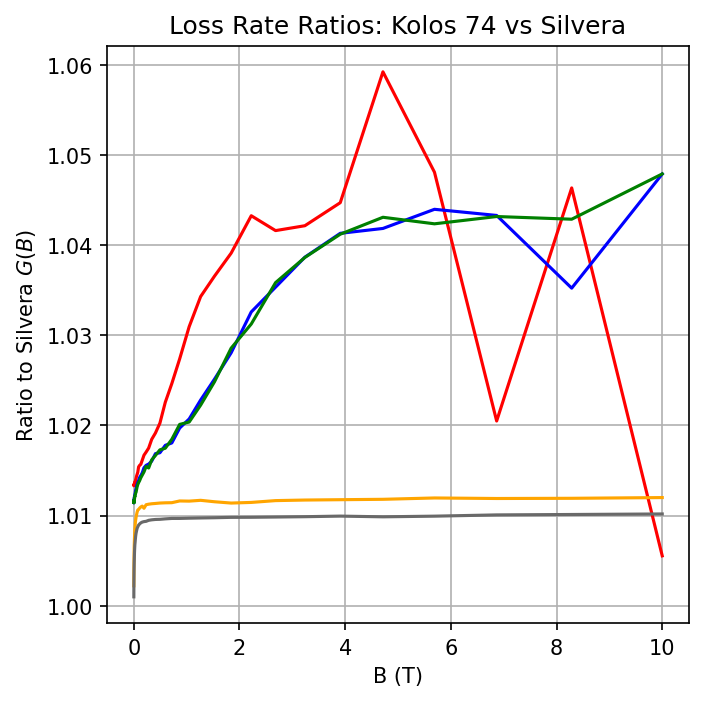

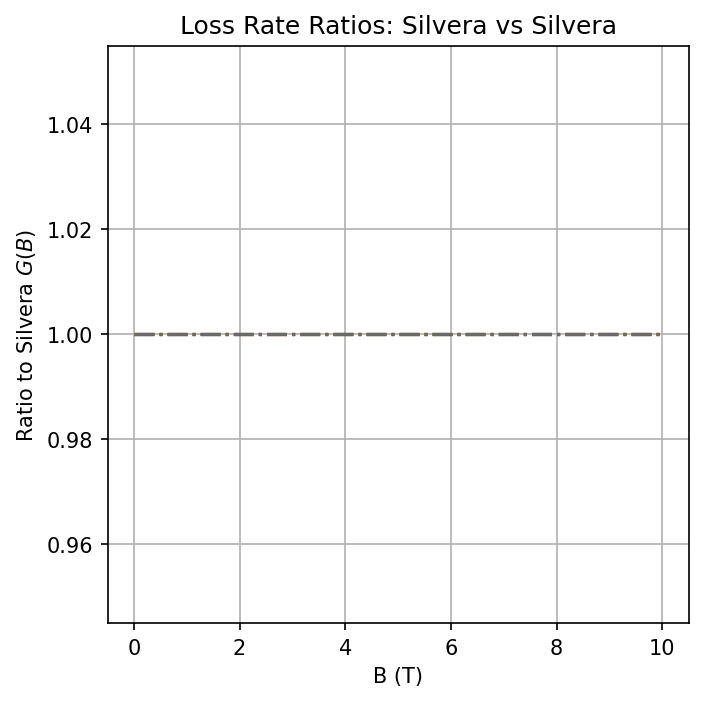

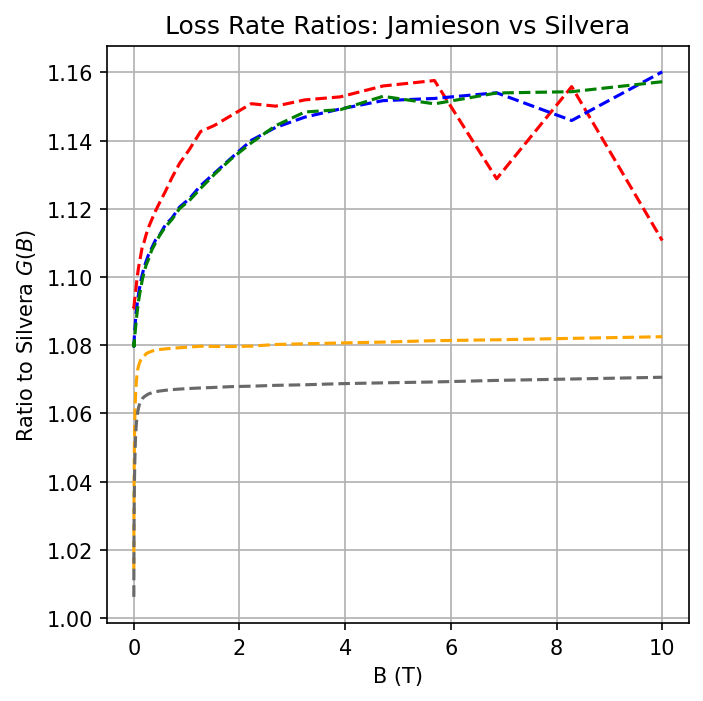

In [4]:
colors = ['red', 'blue', 'green', 'orange', 'dimgrey']
linetypes = ['-', '-.', '--', ':']

for pi, pot_key in enumerate(potentials.Triplets.keys()):
    plt.figure(figsize=(5, 5), dpi=150)

    for ci, c in enumerate(DipoleChannels):
        channel_str = str(c)
        ratios = G_factor_ratiosDip[pot_key][channel_str]
        label = f"Channel {ci+1}" if pi == 0 else None  
        plt.plot(B_values, ratios,
                linetypes[pi % len(linetypes)],
                color=colors[ci % len(colors)],
                label=label)


    plt.xlabel("B (T)")
    plt.ylabel(f"Ratio to {base_key} $G(B)$")
    plt.title(f"Loss Rate Ratios: {pot_key} vs {base_key}")
    plt.grid(True, which='both')
    plt.show()


In [5]:
potS = potentials.Kolos_Singlet2_VDW

G_factors_raw_SETrip = {}
G_factor_ratios_SETrip = {}

base_key = "Silvera"
base_potential = potentials.Triplets[base_key]

base_losses_by_channel = {}
for c in SpinExChannels:
    channel_str = str(c)
    base_losses_by_channel[channel_str] = np.array([spinexchange.GetGFactor(c, B, constants.TritiumConstants(), T, base_potential, potS, rhos)
        for B in B_values])

for pot_key, potT in potentials.Triplets.items():
    G_factors_raw_SETrip[pot_key] = {}
    G_factor_ratios_SETrip[pot_key] = {}

    for c in SpinExChannels:
        channel_str = str(c)
        losses = np.array([spinexchange.GetGFactor(c, B, constants.TritiumConstants(), T, potT, potS, rhos)
            for B in B_values])

        G_factors_raw_SETrip[pot_key][channel_str] = losses
        G_factor_ratios_SETrip[pot_key][channel_str] = losses / base_losses_by_channel[channel_str]


/var/folders/zl/6mjpyqs158s3ql94pwj2jgd40000gn/T/ipykernel_20267/4042977030.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="SpinEx Channels", fontsize=8)


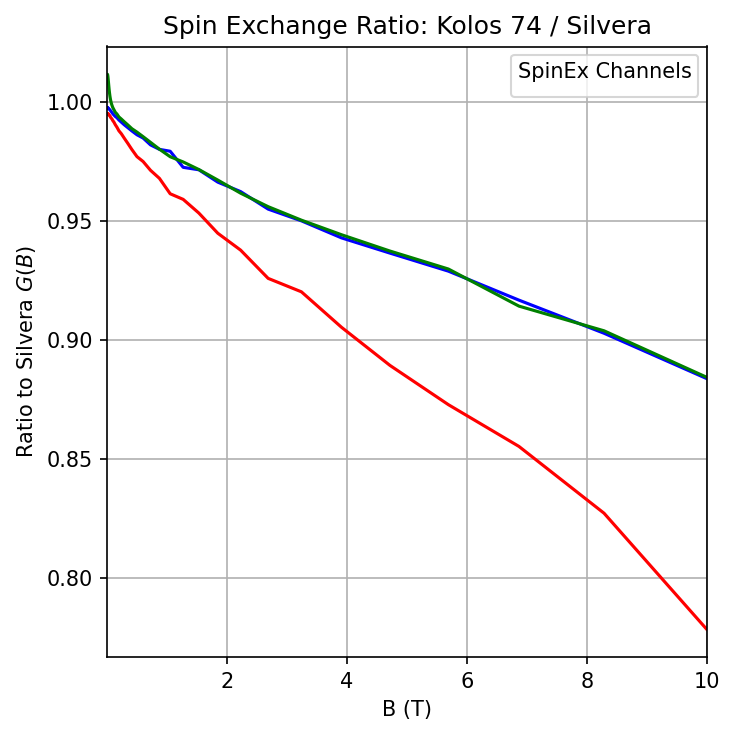

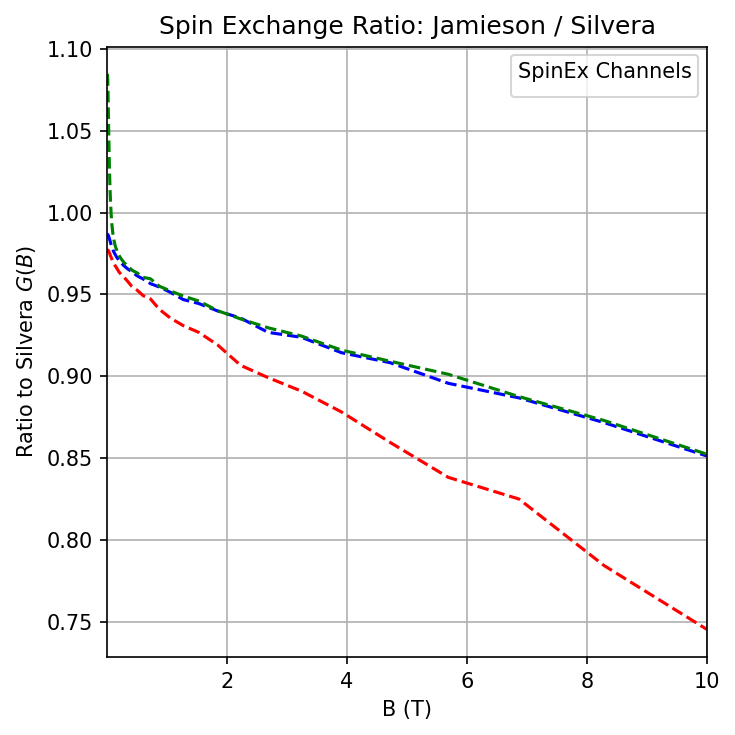

In [6]:
for pi, pot_key in enumerate(potentials.Triplets.keys()):
    if pot_key == base_key:
        continue  # Skip ratio to self

    plt.figure(figsize=(5, 5), dpi=150)

    for ci, c in enumerate(SpinExChannels):
        channel_str = str(c)
        ratios = G_factor_ratios_SETrip[pot_key][channel_str]
        label = f"Channel {ci+1}" if pi == 1 else None  # Label only once to avoid duplicates
        plt.plot(B_values, ratios,
                linetypes[pi % len(linetypes)],
                color=colors[ci % len(colors)],
                label=label)

    plt.xlabel("B (T)")
    plt.xlim(0.001, 10)
    plt.ylabel(f"Ratio to {base_key} $G(B)$")
    plt.title(f"Spin Exchange Ratio: {pot_key} / {base_key}")
    plt.grid(True, which='both')
    plt.legend(title="SpinEx Channels", fontsize=8)
    plt.tight_layout()
    plt.show()


In [7]:
potT = potentials.Silvera_Triplet 

G_factors_raw_SESing = {}
G_factor_ratios_SESing = {}

base_key = "Kolos 74"
base_potential = potentials.Singlets[base_key]

base_losses_by_channel = {}
for c in SpinExChannels:
    channel_str = str(c)
    base_losses_by_channel[channel_str] = np.array([spinexchange.GetGFactor(c, B, constants.TritiumConstants(), T, potT, base_potential, rhos)
        for B in B_values])

for pot_key, potS in potentials.Singlets.items():
    all_losses = []
    for c in SpinExChannels:
        losses = np.array([spinexchange.GetGFactor(c, B, constants.TritiumConstants(), T, potT, potS, rhos)
            for B in B_values])
        all_losses.append(losses)
        
    G_factors_raw_SESing[pot_key] = np.array(all_losses)


In [8]:
for pi, pot_key in enumerate(potentials.Triplets.keys()):
    if pot_key == base_key:
        continue  
    plt.figure(figsize=(5, 5), dpi=150)

    for ci, c in enumerate(SpinExChannels):
        channel_str = str(c)
        ratios = G_factor_ratios_SESing[pot_key][channel_str]
        label = f"Channel {ci+1}" if pi == 1 else None  
        plt.plot(B_values, ratios,
                linetypes[pi % len(linetypes)],
                color=colors[ci % len(colors)],
                label=label)

    plt.xlabel("B (T)")
    plt.xlim(0.001, 10)
    plt.ylabel(f"Ratio to {base_key} $G(B)$")
    plt.title(f"Spin Exchange Ratio: {pot_key} / {base_key}")
    plt.grid(True, which='both')
    plt.legend(title="SpinEx Channels", fontsize=8)
    plt.tight_layout()
    plt.show()

KeyError: 'Silvera'

<Figure size 750x750 with 0 Axes>

In [ ]:
def get_perturbed_results(attr_ref, delta):
    consts = constants.TritiumConstants()
    for name in dir(consts):
        if getattr(consts, name) is attr_ref:
            attr_name = name
            break

    setattr(consts, attr_name, attr_ref + delta)

    results = {}
    for c in DipoleChannels:
        Gs = []
        for B in B_values:
            Gs.append(dipolelosses.GetGFactor(c, B, consts, T, potentials.Silvera_Triplet, rhos, lin=0, lout=2))
        results[str(c)] = np.array(Gs)

    return results

attr_to_perturb = constants.TritiumConstants.nm
delta_value = constants.meeV 
G_perturbed = get_perturbed_results(attr_to_perturb, delta_value)

In [ ]:
original = G_factors_rawDip["Silvera"]  
ratio_vs_unperturbed = {}

for channel_str in original.keys():
    unperturbed = original[channel_str]
    perturbed = G_perturbed[channel_str]
    ratio_vs_unperturbed[channel_str] = perturbed / unperturbed

plt.figure(figsize=(6, 5), dpi=150)

for i, (channel_str, ratio) in enumerate(ratio_vs_unperturbed.items()):
    plt.plot(B_values, ratio,
             label=f"Channel {channel_str}",
             linestyle=linetypes[i % len(linetypes)],
             color=colors[i % len(colors)])

plt.xscale("log")
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.xlabel("B (T)")
plt.ylabel("G (perturbed) / G (original)")
plt.title("G-factor Ratio: Perturbed nm / Original nm")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def get_perturbed_resultsEx(attr_ref, delta):
    consts = constants.TritiumConstants()
    for name in dir(consts):
        if getattr(consts, name) == attr_ref:
            attr_name = name
            break

    setattr(consts, attr_name, attr_ref + delta)

    results = {}
    for c in SpinExChannels:
        Gs = []
        for B in B_values:
            Gs.append(spinexchange.GetGFactor(
                c, B, consts, T,
                potentials.Silvera_Triplet,
                potentials.Kolos_Singlet2_VDW, rhos, lin=0, lout=2))
        results[str(c)] = np.array(Gs)
    return results


attr_to_perturb = constants.TritiumConstants.nm
delta_value = constants.meeV 
G_perturbed = get_perturbed_results(attr_to_perturb, delta_value)

In [ ]:
base = G_factors_raw_SETrip["Kolos 74"]  
ratio_vs_unperturbed = {}

for channel_str in base.keys():
    unperturbed = base[channel_str]
    perturbed = G_perturbed[channel_str]
    ratio_vs_unperturbed[channel_str] = perturbed / unperturbed

plt.figure(figsize=(6, 5), dpi=150)

for i, (channel_str, ratio) in enumerate(ratio_vs_unperturbed.items()):
    plt.plot(B_values, ratio,
             label=f"Channel {channel_str}",
             linestyle=linetypes[i % len(linetypes)],
             color=colors[i % len(colors)])

plt.xscale("log")
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.xlabel("B (T)")
plt.ylabel("G (perturbed) / G (Kolos 74)")
plt.title("G-factor Ratio: Perturbed / Kolos 74 (Triplet)")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()

